# Applications for C++

## g++

### Install g++ compiler

* https://sourceforge.net/projects/mingw/
Install MinGW

* Install mingw32-gccg++-bin

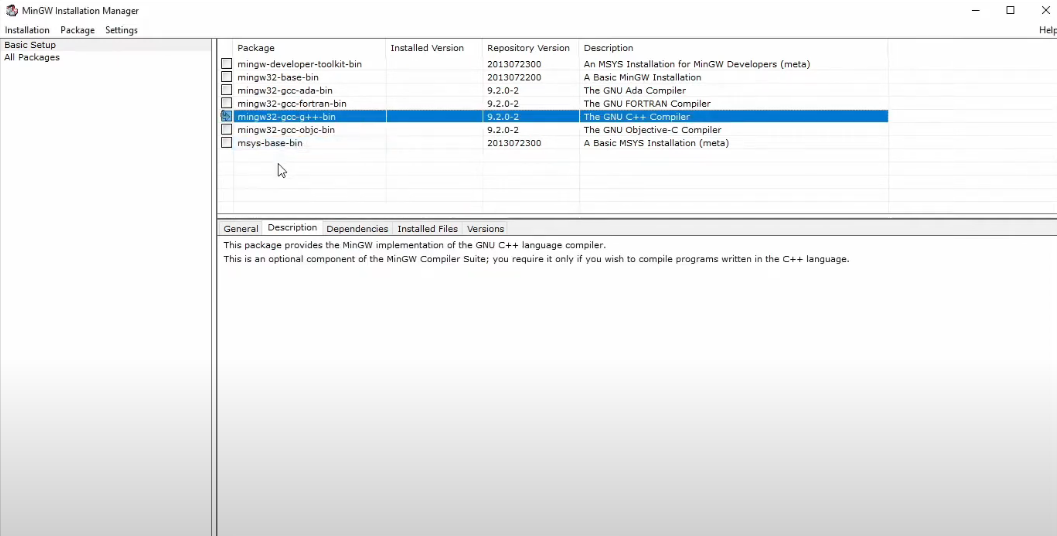

Top left -> Installation -> Apply Changes

* Then, open environment variables in windows

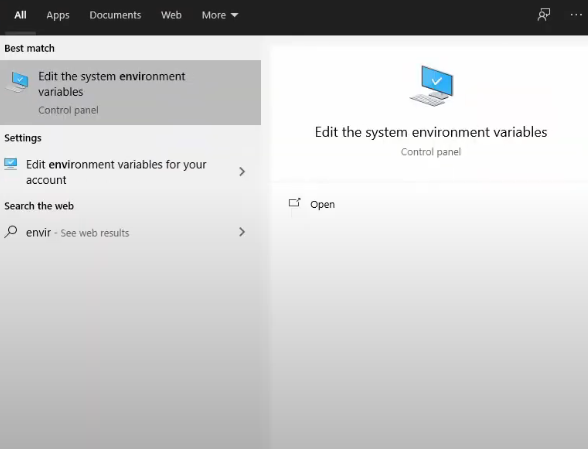

* Add MinGW\bin to path

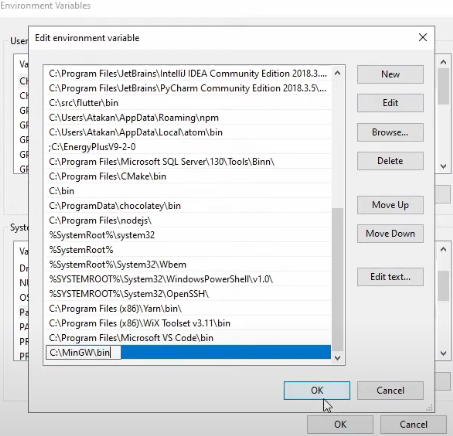

* Check if g++ is installed by running 'g++ -v' in terminal

### g++

### Compile
Creates a file .o

In [ ]:
g++ -c -Wall -Wextra 'file'

### Link

In [ ]:
g++ -o 'executable file name' 'file with .o'

### Execute

In [ ]:
./'file name with .exe'

All in one

In [ ]:
g++ -Wall -Wextra -o <name of o file to be generated> <name of .cc file>

In [ ]:
g++ -Wall -Wextra -o sq sq.cc

### Correct workflow
A class file:       list.h
Member functions:   list.cc
Main function:      ltest.cc

In [ ]:
g++ -c list.cc -std=c++11
g++ -c ltest.cc -std=c++11
g++ -o ltest ltest.o list.o
./ltest

The -c option directs the driver to stop before the linking phase and produce an object file.

gcc also supports giving multiple source files in the same command. Then, that
means to both compile and link.

In [ ]:
g++ -std=c++11 -o ltest ltest.cc list.cc

Otherwise, if the files are already compiled and .o files are produced, using the above code links the file.

In [ ]:
g++ -std=c++11 -o ltest ltest.o list.o

Header files are not included in the g++ command line – they are inserted by
the preprocessor #include directives

### g++ options

In [ ]:
-c                  just compile
-02                 optimize the object code

                    Be aware that optimization takes time, and on a slow
                    machine you may wish to remove this flag during development to save compilation time. Another
                    reason for compiling without optimization is to facilitate debugging

-Wall               print most warnings
-Wextra             print extra warnings
-pedantic-errors    produce errors for using non-standard language extensions
-Wold-style-cast    warn for old-style casts
-std=c++11          follow the C++-11 standard
-Werror             treat warnings as errors (highly recommended)

### g++ error messages

#### undefined reference to ...
Linker error

## Sanitizer (g++)
Catches memory errors or undefined behavior

In [ ]:
-fsanitize=<option> Catches memory errors or undefined behavior, options can be address (memory leaks, buffer overflow), undefined (division by zero, dereferencing null pointers, out-of-bounds array access)

In [ ]:
stack-buffer-overflow   // accessing memory outside valid bounds
heap-buffer-overflow    // same, but for heap
heap-use-after-free     // accessing memory after it has been freed


## WSL

Installation:
Make sure virtualization is turned on in BIOS.

In [ ]:
wsl --install

Restart pc, start Ubuntu from Start and create a unix account.
Good habit to find the path for git repositories and save in a text file.

## GNU make

Automates some bash according to a MakeFile.

Running a make file:
make automatically searches for 'Makefile' as default, and runs targets inside that script. If using -f option, it is specified which file to use.

Example:

In [ ]:
.PHONY: all clean

all: program
	echo "Building program"

program:
	gcc -o program main.c  # Replace with your actual build command

clean:
	rm -f program
	echo "Cleaned up"

If this code is inside Makefile, then using:

In [ ]:
make clean

GNU make will automatically search for the default make file name Makefile and the target clean.

If you want to target a specific Makefile, use:

In [ ]:
make -f <makefile name>

### Create make file

In [ ]:
touch Makefile

### Makefile template

In [ ]:
CC = g++
CFLAGS = -Wall -Wextra -MMD -g #compile options
SRCS = example.cc ... # write .cc files here
OBJS = $(SRCS:.cc=.o)
DEPS = $(SRCS:.cc=.d)

# Build the executable
program: $(OBJS)
	$(CC) -o <.exe name> $(OBJS)
	# if you want to, add the execute of the .exe
	./<exe name>

# Compile source files
%.o: %.cc
	$(CC) $(CFLAGS) -c $< -o $@

# Include the dependency files if they exist
-include $(DEPS)

# Clean rule
.PHONY: clean
clean:
	rm -f $(OBJS) $(DEPS) <.exe name>

Exempel:

In [ ]:
# Build the executable
PROGS =  hello run      // inkludera alla targets som ska hanteras, detta fallet hello och run, som hanteras var för sig, en i taget
all: $(PROGS)

hello: hello.o          // utfärdar target .o om den finns, annars utfärdar targeten istället
	g++ -o hello hello.o

hello.o: hello.cc       // utfärdar koden om hello.cc finns
	$(CC) -c hello.cc

run: hello              // i PROGS så har nu allt för hello lyckats köra, nästa target är run, som utfärdar själva exekveringen
	./hello

print_argv: print_argv.o

# Phony targets
.PHONY: all test clean distclean

### Work with all available .cpp files

In [ ]:
SRCS = $(wildcard *.cpp)  # Automatically finds all .cpp files

### make run options

In [ ]:
make -f <file>  // run file
make -B         // unconditionally make all targets
make -C dir     // change to directory dir and run make there. Useful to recurse into subdirectories.
make -n         // Just print the commands that would be executed but do not execute them.

### If this older than that, then ->

In [ ]:
# The following rule means: "if ltest does not exist, or
# is older than ltest.o or list.o,
# then link ltest".
ltest: ltest.o list.o
	g++ -o ltest ltest.o list.o

### Some coding stuff

In [ ]:
Example:
PROGS = bounds dangling leak sum ub bounds-heap
$(PROGS:=.cc)   // adds .cc to every name in PROGS
$(PROGS:.cc)    // removes .cc from every name in PROGS

## GNU GDB
A GNU based debugger for C++

How to Install GDB?
There are two ways you can install GDB on your linux machine.

1. Install pre-built gdb binaries from verified distribution resources
You can install gdb on Debian-based linux distro (e.g. Ubuntu, Mint, etc) by following command.


In [ ]:
$ sudo apt-get update
$ sudo apt-get install gdb


2. Download source code of GDB, compile it and install.
Follow below mentioned steps to compile GDB from scratch and install it.
Step-1: Download source code.
You can download source code of all release from http://ftp.gnu.org/gnu/gdb/


In [ ]:
$ wget "http://ftp.gnu.org/gnu/gdb/gdb-7.11.tar.gz"

Step-2: Extract it

In [ ]:
$ tar -xvzf gdb-7.11.tar.gz


Step-3: Configure and Compile it.
This step will take a bit of time. So you can sit back and have cup of coffee for a while.
Once it is completed, you can locate gdb binary located at gdb-7.11/gdb/gdb


In [ ]:
$ cd gdb-7.11
./configure
make

Step-4: Install GDB. 

In [ ]:
make install

By default this will install gdb binaries in /usr/local/bin and libs in /usr/local/lib
Congratulation, you have successfully compiled and installed GDB. Once you installed GDB, you can print GDB version to test whether it is installed correctly.


In [ ]:
$ gdb --version

#### Start GDB

In [ ]:
gdb

Or with the text-user interface:

In [ ]:
gdb
<Press CTRL-X then 'a'>

Another way to enable text-user interface:

In [ ]:
tui enable
tui disable

#### Execute debugger
First compile using -g, example:

Two files, list.cc and ltest.cc

In [ ]:
g++ -g -c list.cc
g++ -g -c ltest.cc
g++ -g -o ltest ltest.o list.o
gdb ltest

Or:

In [ ]:
gdb --args program

Where --args are some command line arguments

### Breakpoints

#### Set breakpoint

In [ ]:
break <function name>
break <line number>

#### List breakpoints

In [ ]:
info break

#### Enable, disable or delete

In [ ]:
enable
disable
delete

#### breakpoint commands

In [ ]:
commands

#### breakpoint conditions

In [ ]:
cond

#### Start debugging

In [ ]:
run                 //starts debugger
step
next
continue            // continues until next breakpoint
print <variable>    // prints variable values

### Print variables

In [ ]:
info locals     // local variables
info variables  // global variables

## GNU CMake
Easier version of make, generates appropriate Makefile automatically
Install:

In [ ]:
sudo apt-get install cmake

### Simple cmake for builds
First, separate the main program and put dependencies into a library. The main program will contain following CMakeList.txt:

In [ ]:
cmake_minimum_required (VERSION 3.5)
project (Simple)
set (CMAKE_CXX_STANDARD 11)

# set build type to DEBUG
set(CMAKE_BUILD_TYPE Debug)
# or to get an optimized build w/ debug symbols
# set(CMAKE_BUILD_TYPE RelWithDebInfo)

# add the library to the include file search path
include_directories ("${PROJECT_SOURCE_DIR}/testlib")

add_subdirectory (testlib) 

# set compiler and linker flags
add_compile_options("-Og")
#add_compile_options("-fsanitize=address")
#link_libraries("-fsanitize=address")

# add the executable SimpleMain and its dependency on TestLib
add_executable(SimpleMain main.cc)
target_link_libraries (SimpleMain TestLib)

##################### Optional features below this line ############

# The version number. This is not needed but included
# to show how information can be passed from CMakeLists.txt
# to the program.
set (Simple_VERSION_MAJOR 1)
set (Simple_VERSION_MINOR 0)

# configure a header file to pass some of the CMake settings
# to the source code. Only needed if we want to pass some
# information or configuration from Cmake to the program 
# being built.
configure_file (
  "${PROJECT_SOURCE_DIR}/SimpleConfig.h.in"
  "${PROJECT_BINARY_DIR}/SimpleConfig.h"
  )

# add the binary tree to the search path for include files
# so that we will find SimpleConfig.h
include_directories("${PROJECT_BINARY_DIR}")

The dependencies in their own library, will have this CMakeLists.txt:

In [ ]:
add_library(<library name> <cc file 1> <cc file 2>)

Then, go back into the directory where main program is located, and run following:

In [ ]:
mkdir <build name> && cd <build name>
cmake ..
make

### Release build

Create following CMakeLists.txt:

In [ ]:
# An example CMakeLists.txt for the sanitizers example, showing how to
# enable sanitizers in a debug build.
# It uses generator expressions, to set additional flags when the build type
# is Debug.
#
# To try this out, first create a build directory for a release build, 
# and do a release build, e.g.,
# % mkdir build-rel
# % cd build-rel
# % cmake SRC_DIR -DCMAKE_BUILD_TYPE=Release
# % make
#
# Run the examples and see that they crash.
#
# Then create another build directory and do a debug build:
#
# % mkdir build-dbg
# % cd build-dbg
# % cmake SRC_DIR -DCMAKE_BUILD_TYPE=Debug
# % make
#
# where SRC_DIR is the directory containing the source and CMakeLists.txt,
# e.g., .. if your build directories are placed in this directory.
# 
# Run the examples and verify that the sanitizers find the errors.
#
# If you want to see the actual commands run during the build, for instance
# to verify that the correct compiler flags are used, you can do
#
# % make VERBOSE=1


cmake_minimum_required (VERSION 3.5)
project (Sanitizers)
set (CMAKE_CXX_STANDARD 11)

# The three standard build types are Release, Debug, and RelWithDebInfo.
# If set here, it forces that build type.
#
# set(CMAKE_BUILD_TYPE Release)
# set build type to DEBUG
# set(CMAKE_BUILD_TYPE Debug)
# or to get an optimized build w/ debug symbols
# set(CMAKE_BUILD_TYPE RelWithDebInfo)

# add the executables
add_executable(leak leak.cc)
add_executable(bounds bounds.cc)
add_executable(bounds-heap bounds-heap.cc)
add_executable(ub ub.cc)
add_executable(dangling dangling.cc)
add_executable(sum sum.cc)
add_executable(sum_alt sum.cc)

# set compiler flag to turn off optimization (for all builds)
# add_compile_options("-O0")
# or use generator expressions to set flags in debug builds
add_compile_options($<$<CONFIG:Debug>:-O0>)

# set compiler and linker flags to enable the relevant sanitizer
target_compile_options(leak PUBLIC $<$<CONFIG:Debug>:-fsanitize=leak>)
target_link_libraries(leak $<$<CONFIG:Debug>:-fsanitize=leak>)

target_compile_options(bounds PUBLIC $<$<CONFIG:Debug>:-fsanitize=address>)
target_link_libraries(bounds $<$<CONFIG:Debug>:-fsanitize=address>)

target_compile_options(bounds-heap PUBLIC $<$<CONFIG:Debug>:-fsanitize=address>)
target_link_libraries(bounds-heap $<$<CONFIG:Debug>:-fsanitize=address>)

target_compile_options(ub PUBLIC $<$<CONFIG:Debug>:-fsanitize=undefined>)
target_link_libraries(ub $<$<CONFIG:Debug>:-fsanitize=undefined>)

target_compile_options(dangling PUBLIC $<$<CONFIG:Debug>:-fsanitize=address>)
target_link_libraries(dangling $<$<CONFIG:Debug>:-fsanitize=address>)

target_compile_options(sum PUBLIC $<$<CONFIG:Debug>:-fsanitize=undefined>)
target_link_libraries(sum $<$<CONFIG:Debug>:-fsanitize=undefined>)

target_compile_options(sum_alt PUBLIC $<$<CONFIG:Debug>:-fsanitize=address>)
target_link_libraries(sum_alt $<$<CONFIG:Debug>:-fsanitize=address>)

In [ ]:
% mkdir build-dbg
% cd build-dbg
% cmake SRC_DIR -DCMAKE_BUILD_TYPE=Debug    // SRC_DIR = .. if its one directory above
% make

### Debug build
Same CMakeLists.txt as above.

In [ ]:
% mkdir build-dbg
% cd build-dbg
% cmake SRC_DIR -DCMAKE_BUILD_TYPE=Debug
% make

## Valgrind
Helps finding memory-related errors at precise locations. Note: don't compile with sanitizers

In [ ]:
sudo apt-get install valgrind

Run:

In [ ]:
valgrind ./<.exe file>

# Notes

## excercise 1

### enum from C used in C++
Traditional enum from C is convertible to int, which can lead to unintended behavior. For example:

In [ ]:
enum Color { RED, GREEN, BLUE };
enum Status { SUCCESS, FAILURE };

Color c = GREEN;
if (c == SUCCESS) {  // No compiler error, but it's semantically incorrect
    // Logic error
}

enum from C also uses values that exist in the surrounding namespace, for example:

In [ ]:
enum Color { RED, GREEN, BLUE };
enum Status { SUCCESS, FAILURE, RED }; // Error: 'RED' is already defined

Solution: use enum class in C++. The enum class in C++ has no implicit conversion to int, and uses scoped names, and underlying types can be specified.

## Lab 1

### Terminal and I/O
The code below reads words

In [ ]:
int main()
{
    std::string s;
    while(std::cin >> s){
        std::cout << s << '\n';
    }
}

If you run ./read-words, the code will output what you write (due to std::cin) into the terminal

If you write:
./read-words > out.txt
The output will be printed into a txt document

The contents of a file can be printed out using:
cat out.txt

Also, read-words can be executed to use a text document as an input:
./read-words < read-words.cc

Or use '| less' if you want to scroll with arrowkeys:
./read-words < read-words.cc | less

Output streams can be separated, look at this code:

In [ ]:
/* An example program that prints text to both standard out and standard error.
 */
#include <iostream>

int main()
{
    std::cout << "This text is written to stdout\n";
    std::cerr << "And this is written to stderr\n";
    std::cout << "More text to stdout\n";
    std::cerr << "And some more to stderr\n";
}

Which separates standard output and an error output. Using ./example-out > out.txt will output only the cout, while cerr will be output to terminal.

You can invocate the different streams:

In [ ]:
./example-out > out.txt             //cout
./example-out 2> err.txt            //cerr
./example-out > out.txt 2> err.txt  //separate files at same time
./example-out &> both.txt           //both cout and cerr

### Bash

#### Move files

In [ ]:
mv file1 file2 ... destination/

#### Rename file

In [ ]:
mv oldname newname

#### Get current directory path

In [ ]:
echo "$PWD"

# C++ fundamentals

## File management
The source files contain definitions. To enable separate
compilation, declarations are collected in header files with the extension .h. A C++ program normally consists of many classes that are defined in separate files. It must
be possible to compile the files separately

Define the class list in a file called list.h

In [ ]:
#ifndef LIST_H // include guard
#define LIST_H
// include necessary headers here

class List {
public:
    List();
    int size() const;
    ...
private:
    ...
};
#endif

class member functions in list.cc

In [ ]:
#include "list.h"
// include other necessary headers

List::List() { ... }
int List::size() const { ... }
...


Main function in file ltest.cc

In [ ]:
#include "list.h"
#include <iostream>

int main() {
    List list;
    std::cout << "Size: " << list.size() << std::endl;
    ...
}

## Include

In [ ]:
# include <iostream>

// call namespace within iostream with:
std::cout << "test";

In [ ]:
# include <iostream>
using std::cout;

// now cout can be used without declaring which namespace:
cout << "test";

In [ ]:
// example with string array
# include <iostream>
using std::string;

string sr = "test";

## One Definition Rule (include guards)
En definition får endast göras en gång. Exempel:

In [ ]:
#include <string>
#include <iostream>
using std::cout;
using std::endl;

class Bar{
public:
    Bar(const std::string& s) :str{s} {}
    void print() const {cout << "Bar(" << str << ")\n";}
private:
    std::string str;
};

In [ ]:
#include "bar.h"
#include <iostream>
using std::cout;
using std::endl;


class Foo{
public:
    Foo(const Bar& b, int x) :abar(b), val{x} {}
    void print() {cout << "Foo(" << val << ")\n"; abar.print();}
private:
    Bar abar;
    int val;
};

In [ ]:
#include "foo.h"
#include "bar.h"

int main()
{
    Bar b{"testing"};
    Foo f(b,17);

    f.print();
    return 0;
}

I main koden ovan så är bar definierat i klassen bar, men i foo så används bar och definieras där också. För att komma undan detta:

In [ ]:
#ifndef BAR_H
#define BAR_H

#include <string>
#include <iostream>
using std::cout;
using std::endl;

class Bar{
public:
    Bar(const std::string& s) :str{s} {}
    void print() const {cout << "Bar(" << str << ")\n";}
private:
    std::string str;
};

#endif

In [ ]:
#ifndef FOO_H
#define FOO_H

#include "bar.h"
#include <iostream>
using std::cout;
using std::endl;


class Foo{
public:
    Foo(const Bar& b, int x) :abar(b), val{x} {}
    void print() {cout << "Foo(" << val << ")\n"; abar.print();}
private:
    Bar abar;
    int val;
};

#endif

I #ifndef så kollar kompilatorn om klassen redan är definierat. Om den redan är definierad, så skippar den all ny definition. Annars, så skapar den en ny definition inom #define och #endif.

## Memory management

In [ ]:
new int x = 5;
delete x;

new a[5];
delete a;

## List initialization

In [ ]:
int a{7};

In [ ]:
int x = a{7};

In [ ]:
vector<int> v{1,2,3,4,5};

## Constructor call

In [ ]:
int b(17);

## Pointers
Pointers store memory address of an object
* Can be assigned and copied
* Has an address
* Can be declared without initialization, but then it gets an undefined value, as do other variables

Four possible states:
* Point to an object
* Point to the address immediately past the end of an object
* Point to nothing
* Invalid

Can be used as an integer value for comparisons.

In [ ]:
// in declaration

int *a; // pointer to int
int* b; // pointer to int

int* d, e; // d is a pointer, e is an int
int* f, *g; // f and g are both pointers

Important to separate expressions vs declarations!

In [ ]:
void print(int *p) {    // get the value that the pointer p is pointing to
    cout << "the value pointed to is " << *p << "\n";
}

int main() {
    int x = 42;
    int *p = &x;
    cout << &x << '\n'; // get the reference of x
    cout << x << '\n';  // get x
    cout << *p << '\n'; // get the value that pointer p is pointing to
    cout << p << '\n';  // get the pointer p
}

## References

Basically alias of the thing you reference

In [ ]:
int &temp = x

## Variable declaration

### const
Makes a variable unchangeable, corresponds to final in java.

const modifies everything to the left of const. But if const is first, then it affects the first thing to the right.

In [ ]:
const int x = 5;

### constexpr
Values are calculated in compile time

In [ ]:
constexpr int x = 5+5;

# Algorithms
1. Search, count
2. Compare, iterate
3. Generate new data
4. Copying and moving elements
5. Changing and reordering elements
6. Sorting
7. Operations on sorted sequences
8. Operations on sets
9. Numeric algorithms

Algorithms may modify container elements, but no algorithm inserts or remove elements.

Examples:

In [ ]:
# include <algorithm>
# include <numeric>
# include <random>

### find

In [ ]:
std::find(...)

### find_if

In [ ]:
std:find_if(...)    // example is_odd inside an int array

Example:

In [ ]:
bool is_odd ( int i ) { return ( i % 2) == 1; }

void test_find_if ()
{
    vector <int > v {2 ,4 ,6 ,5 ,3};

    auto it = std :: find_if ( v . begin () , v . end () , is_odd );

    if( it != v . end ())
        cout << " Found " << * it << endl ;
    else
        cout << " Not found " << endl ;
}

### count

In [ ]:
std::count(first, last, value)          //elements equal to value
std::count_if(first, last, predicate)   //elements for which predicate is true

### remove

In [ ]:
std :: remove_if ( c . begin () , c . end () , pred ); //doesn't actually remove the element

### erase
std::vector::erase()
Member function needs to be fulfilled

In [ ]:
c . erase ( new_end , c . end ());
// or
c . erase ( std :: remove_if ( c . begin () , c . end () , pred ) , c . end ());

### insert iterators
Example of insert iterators:

In [ ]:
vector <int > v {1 , 2 , 3 , 4};

vector <int > e ;
std :: copy ( v . begin () , v . end () , std :: back_inserter ( e ));
print_seq ( e );
// length = 4: [1][2][3][4]

deque <int > e2 ;
std :: copy ( v . begin () , v . end () , std :: front_inserter ( e2 ));
print_seq ( e2 );
// length = 4: [4][3][2][1]

std :: copy ( v . begin () , v . end () , std :: inserter ( e2 , e2 . end ()));
print_seq ( e2 );
// length = 8: [4][3][2][1][1][2][3][4]


### transform
Iterate over a sequence, apply a function to each element and write the result to a sequence ("map" in functional language)

Example:

In [ ]:
int square ( int x ) {
    return x * x ;
}

vector <int > v {1 , 2 , 3 , 5 , 8};
vector <int > w ; // w is empty !

transform ( v . begin () , v . end () , back_inserter ( w ) , square );

// w = {1 , 4 , 9 , 25 , 64}

Using function object:

In [ ]:
struct {
    int operator () ( int x ) const {
        return x * x ;
    }
} sq;

vector <int > v {1 , 2 , 3 , 5 , 8};
vector <int > ww ; // ww empty !

transform ( v . begin () , v . end () , back_inserter ( ww ) , sq );

// ww = {1 , 4 , 9 , 25 , 64}


Using lambda function:

In [ ]:
auto sq = []( int x ){ return x * x ;};
transform ( v . begin () , v . end () , back_inserter ( ww ) , sq );

### Rand
Lecture 6 - slide 37

# enum
Allows you to define named integer constants

In [ ]:
enum class Color { RED, GREEN, BLUE };

Color myColor = Color::GREEN;  // Must use Color:: prefix

# Lambda functions
* Capture
Specifies by value or reference
* Parameters
Like normal function declaration
* Return type

In [ ]:
[ capture ] ( parameters ) -> return type { statements }

Example:
Second example, only a is declared, but uses x. Function searches for x in the rest of the code, hence 'capture'.

In [ ]:
auto plus = []( int a , int b ) { return a + b ;}
int x = 10;
auto plus_x = [=]( int a ) { return a + x ;} // x is captured

# Arrays
An array does not know its size - programmer's responsibility. Can contain elements of any type.

Do not use built-in arrays, preferably use:

In [ ]:
char[] // instead use:
std::string

T[] // instead use:
std::vector<T>

In [ ]:
'Object name or primitive type' 'name'[size];

In [ ]:
class Point{
    signed char x;
    signed char y;
}

Point ps[3];

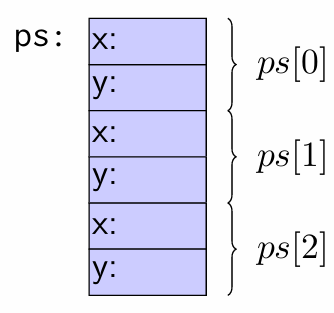

## Built-in arrays

### Accessing a built-in array

Create pointer reference:

In [ ]:
float f[4]; // 4 floats
float* pf;  // pointer to a float

pf = f;     // pointer to the float array

// can also be written as:
pf = &f[0];

Accessing a value using pointer:

In [ ]:
float x = *(pf+3);
// or
x = pf[3]

Accessing a value using variable name:

In [ ]:
x = f[3]

### Array zeroing

Using pointers:

In [ ]:
void zero(int* x, size_t n) {
    for (int* p=x; p!= x+n; ++p)
        *p = 0;
}

int main() {
    int a[5];
    zero(a,5);
}

Using variable names:

In [ ]:
void zero(int x[x], size_t n) {
    for (size_t i=0; i < n; ++i)
        x[i] = 0;
}

### Strings

In [ ]:
char s[6] = "Hello";

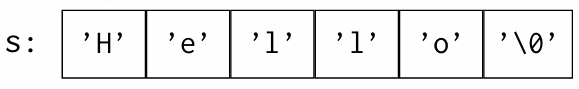

## std

* More functionality
* Safety net

Example:

In [ ]:
# include < iostream >
# include < string >
using std :: string ;
using std :: cout ;
using std :: endl ;

string make_email ( string fname ,
                    string lname ,
                    const string & domain )
{
    fname [0] = toupper ( fname [0]);
    lname [0] = toupper ( lname [0]);
    return fname + ’. ’ + lname + ’@ ’ + domain ;
}
void test_string ()
{
    string sr = make_email ( " sven " , " robertz " , " cs . lth . se " );
    cout << sr << endl ;
}

### Initialization

In [ ]:
# include < iostream >
# include < string >
using std :: string ;
using std :: cout ;
using std :: endl ;

void print_vec ( const std :: string & s , const std :: vector <int >& v )
{
    std :: cout << s << " : " ;
    for (int e : v ) {
    std :: cout << e << " " ;
    }
    std :: cout << std :: endl ;
}
void test_vector_init ()
{
    std :: vector <int > x (7);
    print_vec ( " x " , x );
    // prints x: 0 0 0 0 0 0 0

    std :: vector <int > y (7 ,5);
    print_vec ( " y " , y );
    // prints y: 5 5 5 5 5 5 5

    std :: vector <int > z {1 ,2 ,3};
    print_vec ( " z " , z );
    // prints z: 1 2 3
}

### Insertion and comparison

push_back does insertions

In [ ]:
void test_vector_eq ()
{
    std::vector <int> x {1 ,2 ,3};
    std::vector <int> y;
    y.push_back (1);
    y.push_back (2);
    y.push_back (3);
    if( x == y ) {
        std :: cout << " equal " << std :: endl ;
    } else {
        std :: cout << " not equal " << std :: endl ;
    }
}


### Check range

In [ ]:
vector<T>::at(size_type) // throws out_of_range

# For-loops

In [ ]:
for (int i = 1; i <= 5; ++i) {
    cout << i << " ";
}

# Iterator
Iterator generalized, works for any kind of sequences, that uses begin and last. Useful instead of iterating with pointers.

Standard library put requirements on iterators.

std::find requires for its arguments:

* Must be CopyConstructible and destructible
* EqualityComparable, to have operator!=
* Dereferencable, to have operator* (for reading)
* Incrementable, to have opeartor++

Often specified.

Example:

In [ ]:
template <typename T >
T * find ( T * first , T * last , const T & val )
{
    while ( first != last && * first != val ) ++ first ;
    return first ;
}

Instead:

In [ ]:
template <typename Iter , typename T >
Iter find ( Iter first , Iter last , const T & val )
{
    while ( first != last && * first != val ) ++ first ;
    return first ;
}


## Some types of iterators

con is one of the containers types:
* vektor
* deque
* list
...with element type T

In [ ]:
con<T>::iterator                //runs forward
con<T>::const_iterator          //runs forward, only for reading
con<T>::reverse_iterator        //runs backwards
con<T>::const_reverse_iterator  //runs backwards, only for reading

## istream_iterator
Example:

In [ ]:
# include < iterator >

stringstream ss { " 1 2 12 123 1234\ n17 \ n \ t42 " };

istream_iterator <int > iit ( ss );
istream_iterator <int > iit_end ;

while ( iit != iit_end ) {
    cout << * iit ++ << endl ;
}

// output:
1
2
12
123
1234
17
42

Useful because array types usually take iterator streams as parameters, eliminating the need to write your own while function.

Example:

In [ ]:
stringstream ss { " 1 2 12 123 1234\ n17 \ n \ r42 " };

istream_iterator <int > iit ( ss );
istream_iterator <int > iit_end ;

vector <int > v ( iit , iit_end );

for ( auto a : v ) {
    cout << a << " " ;
}
cout << endl ;


### Counting with istream_iterator
Example not using istream:

In [ ]:
istringstream ss { s };
int words {0};
string tmp ;
while ( ss >> tmp ) ++ words ;

But instead using istream:

In [ ]:
istringstream ss { s };
int words = distance ( istream_iterator < string >{ ss } ,
                        istream_iterator < string >{});

## min_element in iterator range
Works only for types with < operator
Example:

In [ ]:
int a[] {3 ,5 ,7 ,6 ,8 ,5 ,2 ,4};
auto ma = min_element( begin(a), end(a));
auto ma2 = min_element ( a +2 , a +4);
vector <int > v {3 ,5 ,7 ,6 ,8 ,5 ,2 ,4};
auto mv = min_element ( v . begin () , v . end ());

Overload compare operator, inside the min_element class:

In [ ]:
template < class FwdIt , class Compare >
FwdIt min_element ( FwdIt first , FwdIt last , Compare cmp)
{
    ...


Therefore add comparator parameter

In [ ]:
std :: vector < const char * > tl = { " strings " , " in " , " a " , " vector " };
Str_Less_Than lt ; // functor
cout << * min_element ( tl . begin () , tl . end () , lt );

Lambda:

In [ ]:
auto cf = []( const char * s , const char * t ){ return strcmp (s , t ) <0;};
cout << * min_element ( tl . begin () , tl . end () , cf );

## (MOVE THIS!) Templating begin() and end()

In [ ]:
template <typename T >
class Vector {
public :
    ...
    T * begin () { return sz > 0 ? elem : nullptr ;}
    T * end () { return begin ()+ sz ;}
    const T * begin () const { return sz > 0 ? elem : nullptr ;}
    const T * end () const { return begin ()+ sz ;}
private :
    int sz ;
    T * elem ;
};


# Switch

In [ ]:
switch (df) {
            case DeleteFlag::LESS:
                shouldRemove = (current->value < d);
                break;
            case DeleteFlag::EQUAL:
                shouldRemove = (current->value == d);
                break;
            case DeleteFlag::GREATER:
                shouldRemove = (current->value > d);
                break;
        }

Samma som:

In [ ]:
if (df == DeleteFlag::LESS) {
    ...
}
if (df == DeleteFlag::EQUAL) {
    ...
}

# Range-for (for-each)
Called range for because std::for-each already in library, different name not to overload.

In [ ]:
std::vector<int> v {1,2,3,4};
for (int e : v) {
    std::cout << e << "\n";
}

# iostream, inputs outputs

## System print

In [ ]:
# include <iostream>

int main() {
    std::cout << "Hello World!";
    return 0;
}

## User input

In [ ]:
std::cin >> v.elem[2];

# Classes & struct

## Classes
Skrivs lämpligast i header filer

In [ ]:
// example

class bar {
    public:
        Bar(int v=100, bool b=false) :value{v}, flag{b} {}
    private:
        int value;
        bool flag;
}

In [ ]:
// default declaration

class Foo {
    public:
        Foo () =default;
    private:
        int value {0};
        bool flag {false};
}

### Default constructor
A constructor that takes no arguments, using =default lets the compiler provide a default constructor by itself.

In [ ]:
 struct Sales_data {

    // constructors added
    Sales_data() = default;
    Sales_data(const std::string &s): bookNo(s) { }
    Sales_data(const std::string &s, unsigned n, double p):
    bookNo(s), units_sold(n), revenue(p*n) { }
    Sales_data(std::istream &);
    
    // other members as before
    std::string isbn() const { return bookNo; }
    Sales_data& combine(const Sales_data&);
    double avg_price() const;
    std::string bookNo;
    unsigned units_sold = 0;
    double revenue = 0.0;
 };

### Copy constructor

In [ ]:
class Foo {
    public:
    Foo(); // default constructor
    Foo(const Foo&); // copy constructor
    // ...
};

Synthesized:

In [ ]:
class Sales_data {
public:
    // other members and constructors as before
    // declaration equivalent to the synthesized copy constructor
    Sales_data(const Sales_data&);
private:
    std::string bookNo;
    int units_sold = 0;
    double revenue = 0.0;
};
// equivalent to the copy constructor that would be synthesized for Sales_data
    Sales_data::Sales_data(const Sales_data &orig):
    bookNo(orig.bookNo),            // uses the string copy constructor
    units_sold(orig.units_sold),    // copies orig.units_sold
    revenue(orig.revenue)           // copies orig.revenue
    {   }                           // empty body

### Destructor
A function that gets automatically called when deleting an object. Without a destructor, the compiler provides a default destructor.

In [ ]:
class Foo {
    public:
        ~Foo(); // destructor
        // ...
};

### Constructor delegation
Ha en huvud constructor, alla andra constructors nyttjar denna, fast i olika 'fall'

In [ ]:
class Sales_data {
    public:

    // nondelegating constructor initializes members from corresponding arguments
    Sales_data(std::string s, unsigned cnt, double price):
            bookNo(s), units_sold(cnt), revenue(cnt*price) { }

    // remaining constructors all delegate to another constructor
    Sales_data(): Sales_data("", 0, 0) {}
    Sales_data(std::string s): Sales_data(s, 0,0) {}
    Sales_data(std::istream &is): Sales_data()
                                    { read(is, *this); }
    // other members as before
 };

### Copy object
May use built in default copy constructors, but otherwise =default, or =delete

In [ ]:
// examples, a class bar
bar b1{}
bar b2{b1}

In [ ]:
class C {
    public:
        C(const C&);
}

### Operator overloading
(+ - < >) can be overloaded in member functions

### inline
Normally, when a function is called, there is an overhead of pushing arguments onto the stack, jumping to the function’s address, and then returning.

An inline function eliminates this overhead by directly inserting the function’s code where it is called.

In [ ]:
#include <iostream>

inline int square(int x) {
    return x * x;
}

int main() {
    std::cout << square(5) << std::endl; // No function call overhead
    return 0;
}

The compiler replaces square(5) with 5 * 5 in the compiled code.

### Friend function

In [ ]:
A friend function is a function that is not a member of a class but is granted access to its private members.

In [ ]:
#include <iostream>

class Box {
private:
    int width;

public:
    Box(int w) : width(w) {}

    // Declare a friend function
    friend void printWidth(Box b);
};

// Friend function definition
void printWidth(Box b) {
    std::cout << "Width: " << b.width << std::endl; // Accessing private member
}

int main() {
    Box box(10);
    printWidth(box); // Allowed because printWidth is a friend function
    return 0;
}

printWidth() is not a member of Box, but it can access width because it is declared as a friend.

### static members
The member value is shared throughout the class, and not individual to each object

In [ ]:
class Account {
public:
    void calculate() { amount += amount * interestRate; }
private:
    static double interestRate;
    // remaining members as before
};

## Structures

Data structures

### Creating structures

In [ ]:
struct test{
    test(int val1, int val2) :x(val1), y(val2) {} // constructor

    // saves values initialized in constructor
    int x;
    int y;

    // member function
    void print() {
        cout << "value x: " << x << "\n" << "value y: " << y << "\n";
    }

};

int main() {
    test f{55, 12};
    f.print();  // executes member function
}

### Accessing structures

In [ ]:
Vector v;
Vector& rv = v;
Vector* pv = &v;

int i = v.sz;   // direct access, using name of variable
int j = rv.sz;  // access via reference
int k = pv->sz; // access via pointer
// or
int k = (*p).x

## Name spaces
Functions made by users can share similar names as those built-in to other libraries. Primarily, the function that is called is first looked up into the class in which the object belongs to. So:

In [ ]:
test::Foo f(42);    // enters namespace test, creates an object f of class Foo.
test::print(f);     // enters namespace test, uses function print.

// if print does not exist in the class, uses one namespace above of test:
print(f);

// if a function is used without an object belonging to the class as a parameter:
print(1000);    // the class can't be found

//  'using' sets a name as standard for all
using test::print;
print(1000);    // no need to search if print is included in parameter class, always uses print belonging to test now.

### Creating a namespace

In [ ]:
namespace MyNamespace {
    void myFunction() {
        std::cout << "Hello from MyNamespace!" << std::endl;
    }

    int myVariable = 42;
}

// Using the namespace
int main() {
    MyNamespace::myFunction(); // Access the function
    std::cout << "myVariable: " << MyNamespace::myVariable << std::endl;
    return 0;
}

## Unnamed namespaces
Clash with global names

In [ ]:
namespace foo {
    void test() {
        cout << "foo::test() \n";
    }
}
namespace { // unnamed namespace
    void test() {
        cout << "::test()\n";
    }
}

In [ ]:
int main() {
    test();
    foo::test();
    ::test();
}

In [ ]:
// output
::test()
foo::test()
::test()

# Templates
Instead of unique code for several data types, for the same goal, create templates.

Example:

In [ ]:
#include <iostream>
using std::cout;
using std::endl;
using std::string;

#if 0
void print(int x)
{
    cout << x << "\n";
}

void print(const char* x)
{
    cout << x << "\n";
}

void print(string x)
{
    cout << x << "\n";
}
#else
template <typename T>       // template in question
void print(const T& x)
{
    cout << x << "\n";
}
#endif
struct Foo{
    int x;
};

std::ostream& operator<<(std::ostream& os, const Foo&)
{
    return os << "FOO!";
}
int main()
{
    auto x = 17;
    print(x);

    auto s = "hello";
    print(s);

    string t("testing");
    print(t);

    Foo f;
    print(f);
}

## Function template av en template klass

In [ ]:
template <typename T >
T& find ( const Vector <T >& v , const T & val )
{
    if( v . size () == 0) throw std :: invalid_argument ( " empty vector " );
        for (int i =0; i < v . size (); ++ i ){
        if( v [ i ] == val ) return v [ i ];
    }
    throw std :: runtime_error ( " not found " );
}

Another example, 'find an element' to template:

In [ ]:
int * find ( int * first , int * last , int val )
{
    while ( first != last && * first != val ) ++ first ;
    return first ;
}

Template:

In [ ]:
template <typename T >
T * find ( T * first , T * last , const T & val )
{
    while ( first != last && * first != val ) ++ first ;
    return first ;
}

## Class template
Example:

In [ ]:
template <typename T >
class Vector {
private :
    T * elem ;
    int sz ;
public :
    explicit Vector ( int s );
    ~ Vector () { delete [] elem ;}

// copy and move ...

    T & operator []( int i );
    const T & operator []( int i ) const ;
    int size () const { return sz ;}
};

Using inheritance:

In [ ]:
//header
class Container {
public:
    virtual int size () const =0;
    virtual int& operator []( int o ) =0;
    virtual ~ Container () {}
    virtual void print () const =0;
};

class Vector : public Container {
public:
    explicit Vector ( int l );
    ~ Vector ();
    int size () const override ;
    int & operator []( int i ) override ;
    virtual void print () const override ;
private:
    int * p ;
    int sz ;
};


In [ ]:
//class
template <typename T >
class Container {
public :
    using value_type = T ;
    virtual size_t size () const =0;
    virtual T& operator []( size_t o ) =0;
    virtual ~ Container () {}
    virtual void print () const =0;
};

template <typename T >
class Vector : public Container <T> {
public :
    Vector ( size_t l = 0) : elem { new T[ l ]} , sz { l } {}
    ~ Vector () { delete [] elem ;}
    size_t size () const override { return sz ;}
    T& operator []( size_t i ) override { return elem [ i ];}
    virtual void print () const override ;
private :
    T * elem ;
    size_t sz ;
};


## Template list initializer
Generic for types

In [ ]:
Vector <int > vs {1 ,3 ,5 ,7 ,9}; //goal

template <typename T >
Vector <T >:: Vector ( std :: initializer_list <T > l )
                        : Vector <T >( static_cast <int >( l . size ()))
{
    std :: copy ( l . begin () , l . end () , elem );
}


## Template print
Unorthodox in c++ ways, in reality should just be of type which implements operator<< to use standard print function

In [ ]:
template <typename T >
void Vector <T >:: print () const
{
    for ( size_t i = 0; i != sz ; ++ i )
        cout << p [ i ] << " " ;
    cout << endl ;
}

For example, if using a type without operator<<:

In [ ]:
template <> //full specialization: no template arguments
void Vector <Foo >:: print () const
{
    for ( size_t i = 0; i != sz ; ++ i )
        cout << " Foo ( " <<p [ i ]. x << " ) " ;
    cout << endl ;
}

## Explicit type conversion
Ex:

In [ ]:
cout << compare<double>(i,d) << endl;

For readability, better to be explicit:

In [ ]:
cout << compare(static_cast<double>(i),d) << endl;

## Two template parameters
Ex:
First argument gives int, second gives double.

In [ ]:
template <typename T , typename U >
int compare2 ( const T & a , const U & b )
{
    if( a < b ) return -1;
    if( b < a ) return 1;
    return 0;
}

void example3 ()
{
    int i {5};
    double d {5.5};

    cout << compare2 (i , d ) << endl ; // -1
}


## Overloading templates with normal functions
Example class Name with no operator <

In [ ]:
const Name & minimum ( const Name & a , const Name & b )
{
    if( a . s < b . s )
        return a ;
    else
        return b ;
}

## Type tracking
Templates needs to track types in returns, for example if no common operator for the types exist, use common_type

In [ ]:
template <typename T , typename U >
auto
minimum ( const T & a , const U & b ) -> decltype ( a + b );

adds the unnecessary requirement that there is an operator+.

Better:

In [ ]:
# include <type_traits>

template <typename T, typename U>
std::common_type<T, U>::type
minimum(const T& a ,const U& b);

std::common_type<T,U>::type is
a type that T and U can be implicitly converted to If no such a type
exists, there is no member type.

# Error handling

## try-catch

In [ ]:
try {
    // code that may throw
}
catch (some exception) {
    // code handling
}
catch (another exception) {
    // code handling
}
catch (...) {
    // handles anything
}

## throw

In [ ]:
...
if (sz <0) throw length_error("negative size");

## custom exceptions

Creating custom exception:

In [ ]:
struct MyOwnException{
    MyOwnException(const std::string& msg, int val)
            : m{msg}, val{val} {}
        std::string m;
        int v;
}

Using custom exception:

In [ ]:
void f() {
    throw MyOwnException("An error occured", 17);
}

void test1() {
    try{
        f();
    } catch(MyOwnException &e) {
        cout << "Exception: " << e.m << " - " << e.v << end1;
    }
}

## noexcept
Ignores exceptions

In [ ]:
struct Foo {
    void f();
    void g() noexcept;
}

## static_assert
Checks in compile time. Also contains meta functions in standard library, for more specific checks.

In [ ]:
int foo(int x) {
    static_assert(some_param > 100, "");
    return 2*x;
}